In [1]:
%matplotlib inline

import os, sys
import h5py
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec

from matplotlib.colors import LogNorm, SymLogNorm
plt.rcParams['image.cmap'] = 'terrain_r'

In [2]:
II = []
lbl = []
with h5py.File('../data/hits/examples.h5', 'r') as f:
    for j in range(4):
        II.append(f[f'hit_{j}/image'][:])
        lbl.append(f[f'hit_{j}/lbl'][()])


84.5873031616211


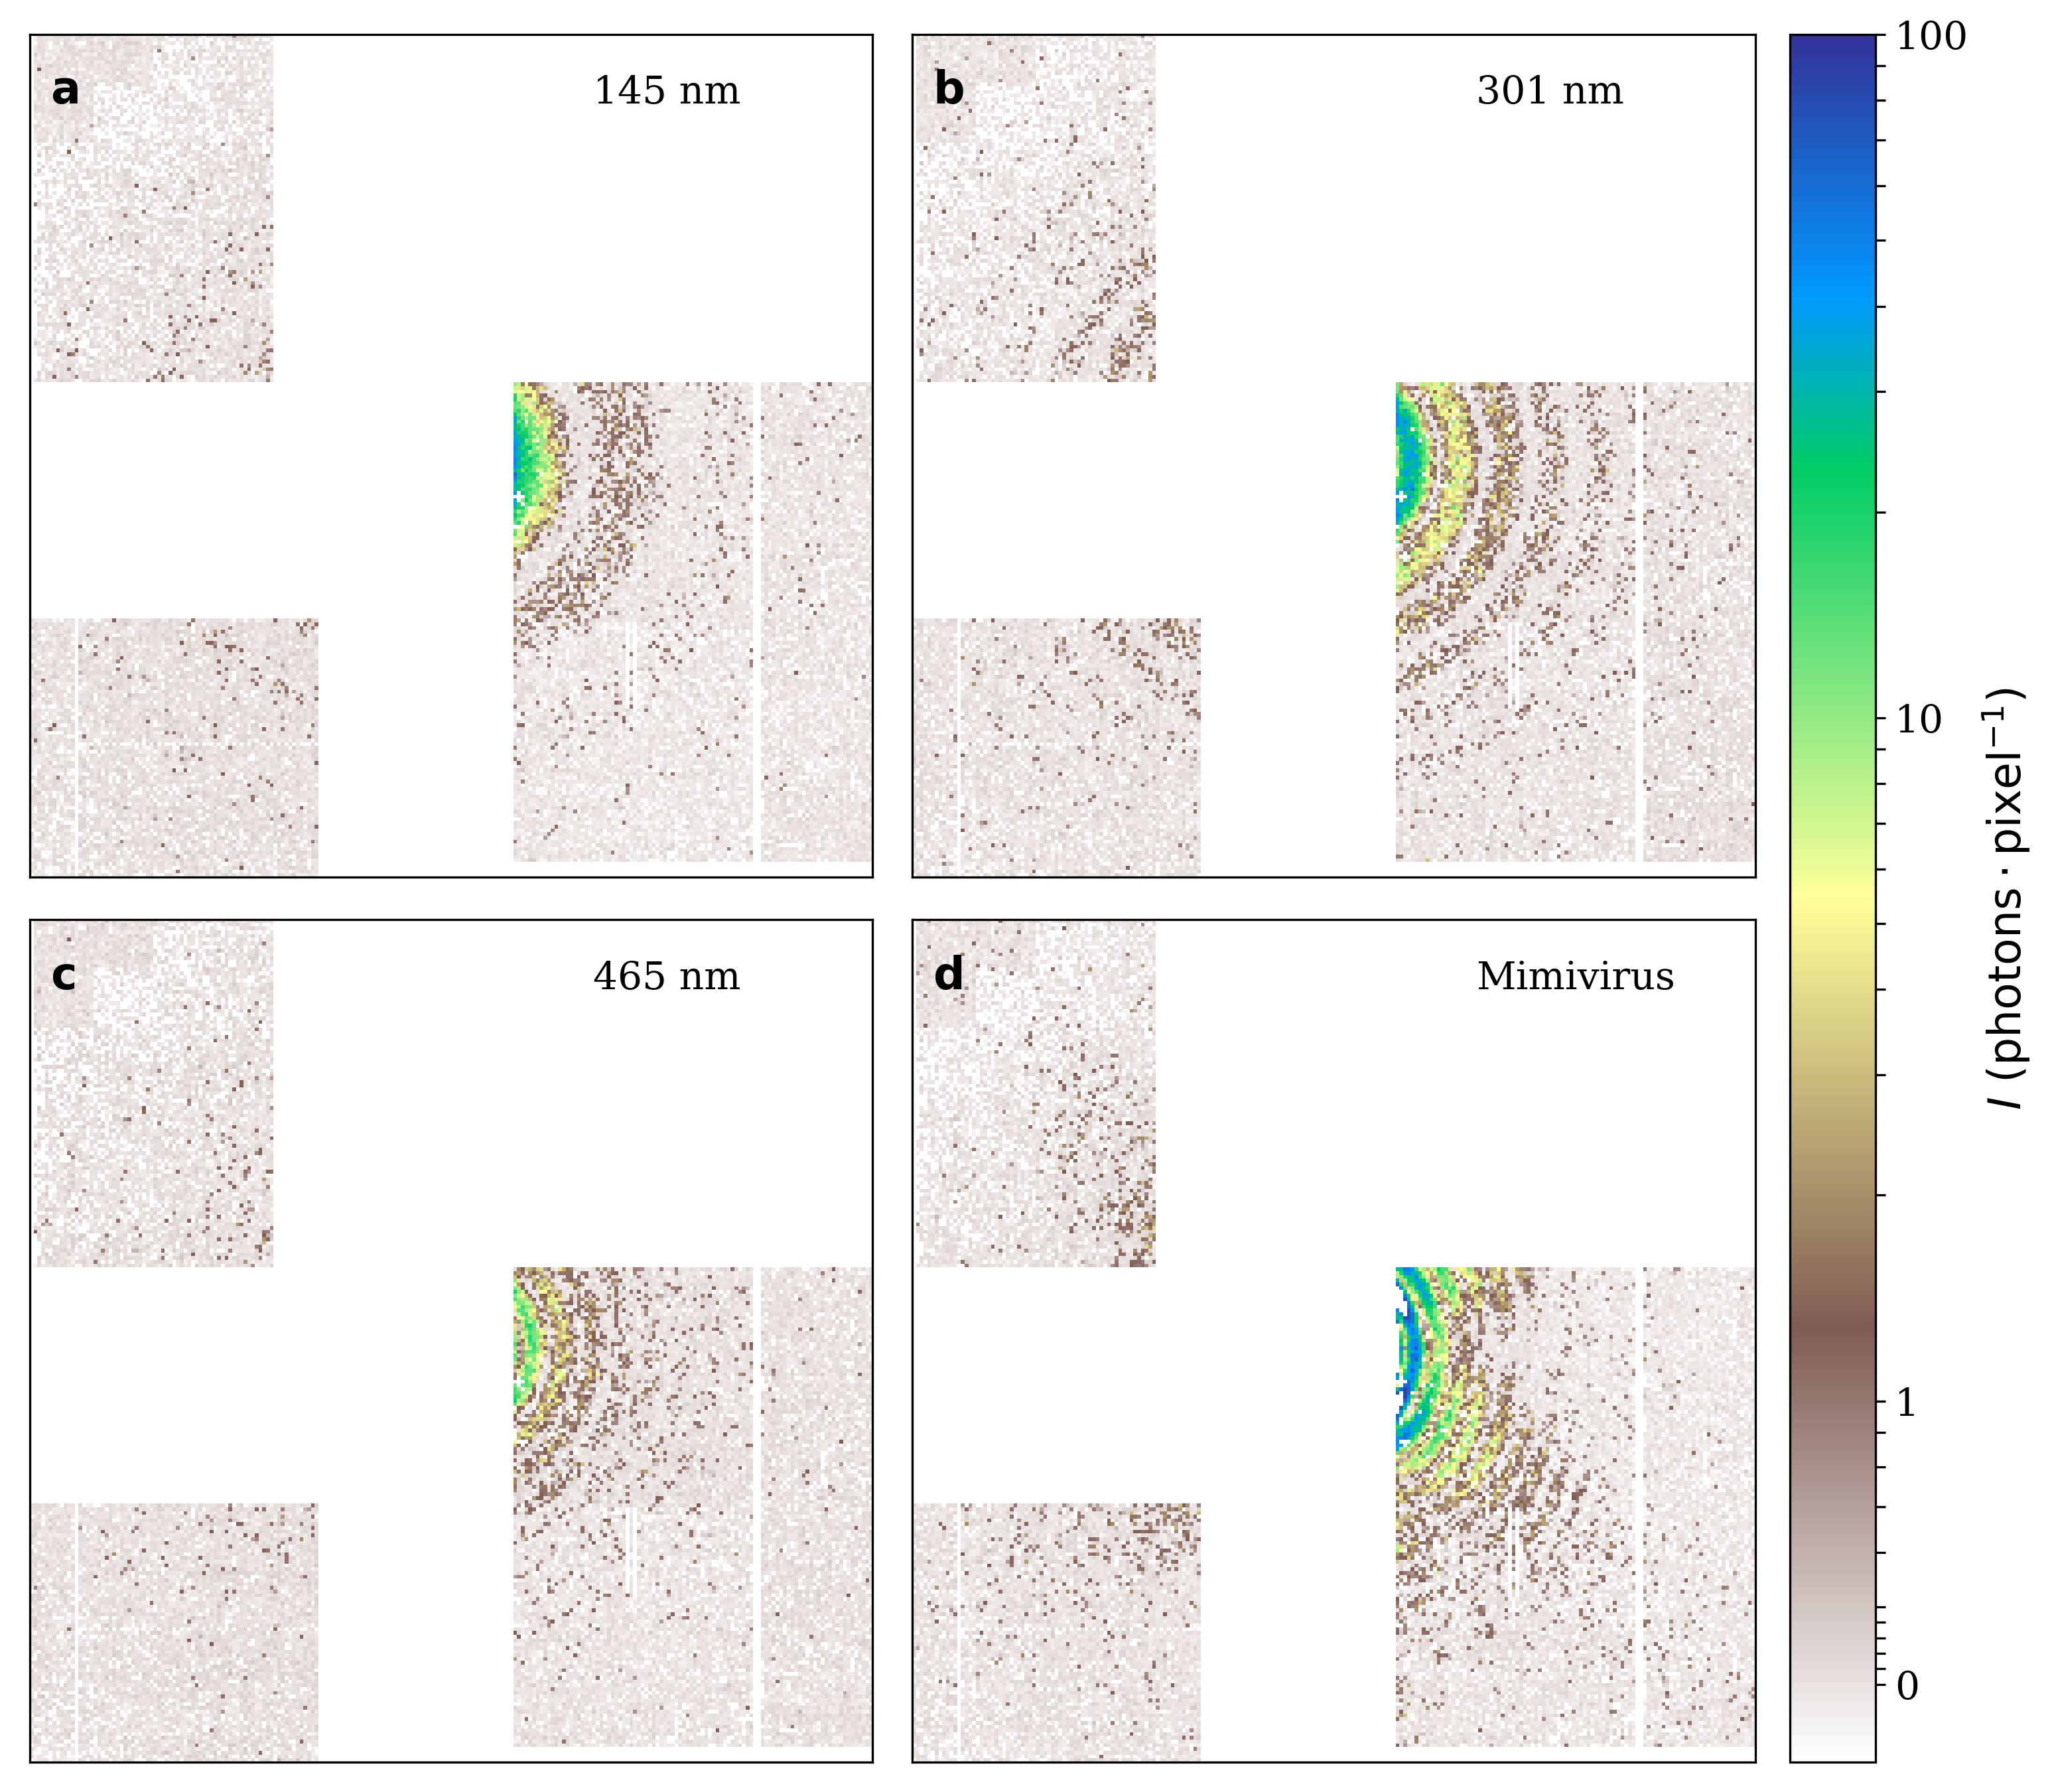

In [3]:
plt.rc('font', family='serif', size=16)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=16)
plt.rc('axes', titlesize=16)

fig=plt.figure(figsize=[12,11.5], tight_layout=False, dpi=300)
gs = plt.GridSpec(2, 3, wspace=0.05, hspace=0.05, width_ratios=[1, 1, 0.1])

mx = max([img[~np.isnan(img)].max() for img in II])
if mx < 1:
    mx = 1
print(mx)
ss = ((np.log(mx) - np.log(.5)) / (0.5))/100
nrm = SymLogNorm(0.5, ss, -0.5, 100, base=10)

for i in range(4):
    ax = fig.add_subplot(gs[i//2,i%2])

    im = ax.matshow(II[i][100:-100,100:-100], norm=nrm, vmax=100)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(5,18, '$\mathbf{' + chr(97+i) + '}$',fontsize=16)
    ax.text(150,18, lbl[i],fontsize=14)
    
cax1 = fig.add_subplot(gs[:,2])

plt.colorbar(im, cax=cax1)
cax1.set_yticklabels([0] + ['']*9 +[ 1 ] + ['']*8 +[ 10] + ['']*8 +[ 100])
cax1.set_ylabel("$I\ (\mathrm{photons\cdot pixel}^{-1})$", fontsize=16)

plt.savefig('pdf/figure_1.pdf')
plt.savefig('eps/figure_1.eps')

plt.show()